<a href="https://colab.research.google.com/github/SamiOmran/Prediction-of-Product-Sales/blob/master/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sami Imran**

# **Prediction of Product Sales**

**Author:** Sami Imran

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Project/sales_predictions_2023.csv'
df = pd.read_csv(data_path)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. **`We have 8523 rows`**
2. **`We have 12 columns`**
3. **`5 numaric columns, 7 string columns`**

## Clean Data

**First check for duplicates and delete them.**

In [5]:
duplicates = df.duplicated().sum()
duplicates

0

**We have 0 duplciates for now**

**Check for null values**

In [6]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**only 2 columns have missing values**


1.   `Item_weight` is numaric column so we use numaric place holder to fill NaN
2.   `Outlet_Size` is object(categorical) column so we use text place holder.




Now before adding place holder we need to check what is the logical values for `Item_weight` column

In [7]:
min, max = df['Item_Weight'].min(), df['Item_Weight'].max()
min, max

(4.555, 21.35)

In [8]:
df['Item_Weight'] = df['Item_Weight'].fillna(0)

In [9]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')

In [10]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Now we have 0 NaN values**

**Check for inconsistent values**

In [11]:
cat_cols = df.select_dtypes('O').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [13]:
item_fat_content_dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_content_dict)

In [14]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


**We fixed the inconsistent values for `Item_Fat_Content`**

In [15]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [16]:
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [17]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [18]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
Large,932


In [19]:
df['Outlet_Location_Type'].value_counts()
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [20]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
df[num_cols].describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,10.651,0.066,140.993,1997.832,2181.289
std,6.432,0.052,62.275,8.372,1706.500
min,0.000,0.000,31.290,1985.000,33.290
25%,6.650,0.027,93.826,1987.000,834.247
50%,11.000,0.054,143.013,1999.000,1794.331
75%,16.000,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


**From describe function we can see the mean, max and min values for each column**

## Exploratory Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Histograms**

In [23]:
colors = ['purple', 'blue', 'green', 'yellow', 'red']
list_cols = list(df.select_dtypes('number').columns)

numerical_cols = [(colors[i], list_cols[i]) for i in range(5)]
numerical_cols

[('purple', 'Item_Weight'),
 ('blue', 'Item_Visibility'),
 ('green', 'Item_MRP'),
 ('yellow', 'Outlet_Establishment_Year'),
 ('red', 'Item_Outlet_Sales')]

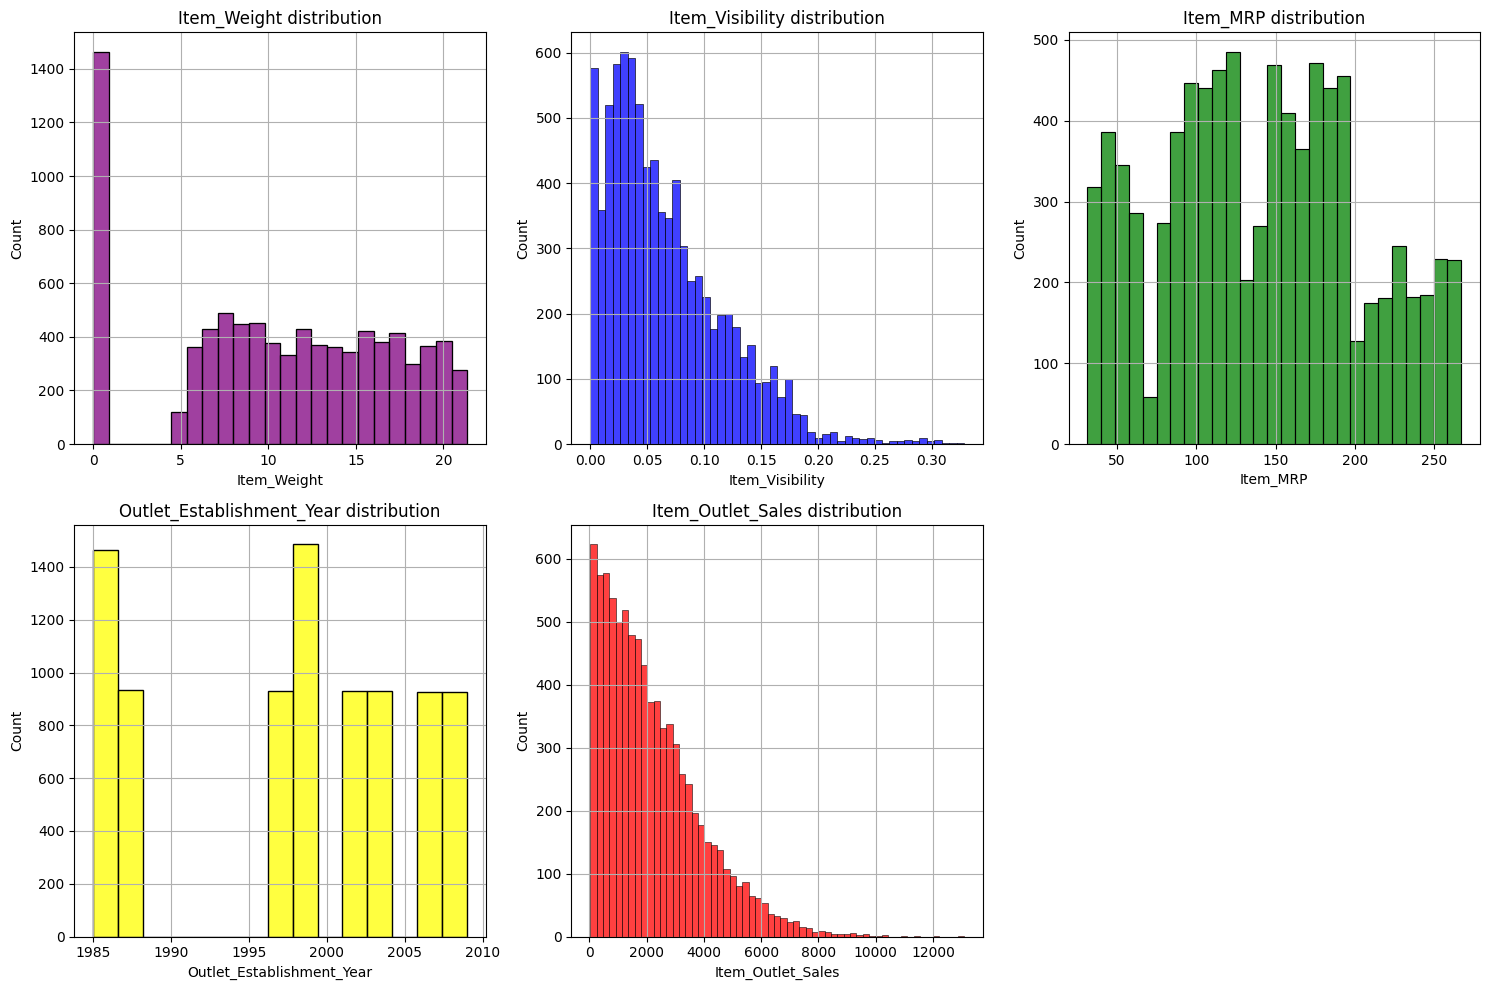

In [71]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));
ax[1][2].axis('off')

for i in range(2):
  for j in range(3):
    index = i*3+j

    if index < len(numerical_cols):
      color = numerical_cols[index][0]
      feature_name = numerical_cols[index][1]

      subplot = sns.histplot(df[feature_name], ax = ax[i, j], color = color)
      subplot.set_title(f'{feature_name} distribution')
      subplot.grid()

fig.tight_layout()
plt.show()
fig.savefig('histograms.png', dpi = 300)

**From the figure above we can see the distribution for each numerical columns:**

1. For **Item_Weight** column we have more than 1400 missing values(weight = 0g),the minimum weight is 4.5g and the maximum weight is 21.35g


2. For **Item_Visibility** column the distribution goes from 0.0% - 0.35%

3. For **Outlet_Establishment_Year** column the range from 1985 - 2009



### **Box plots**

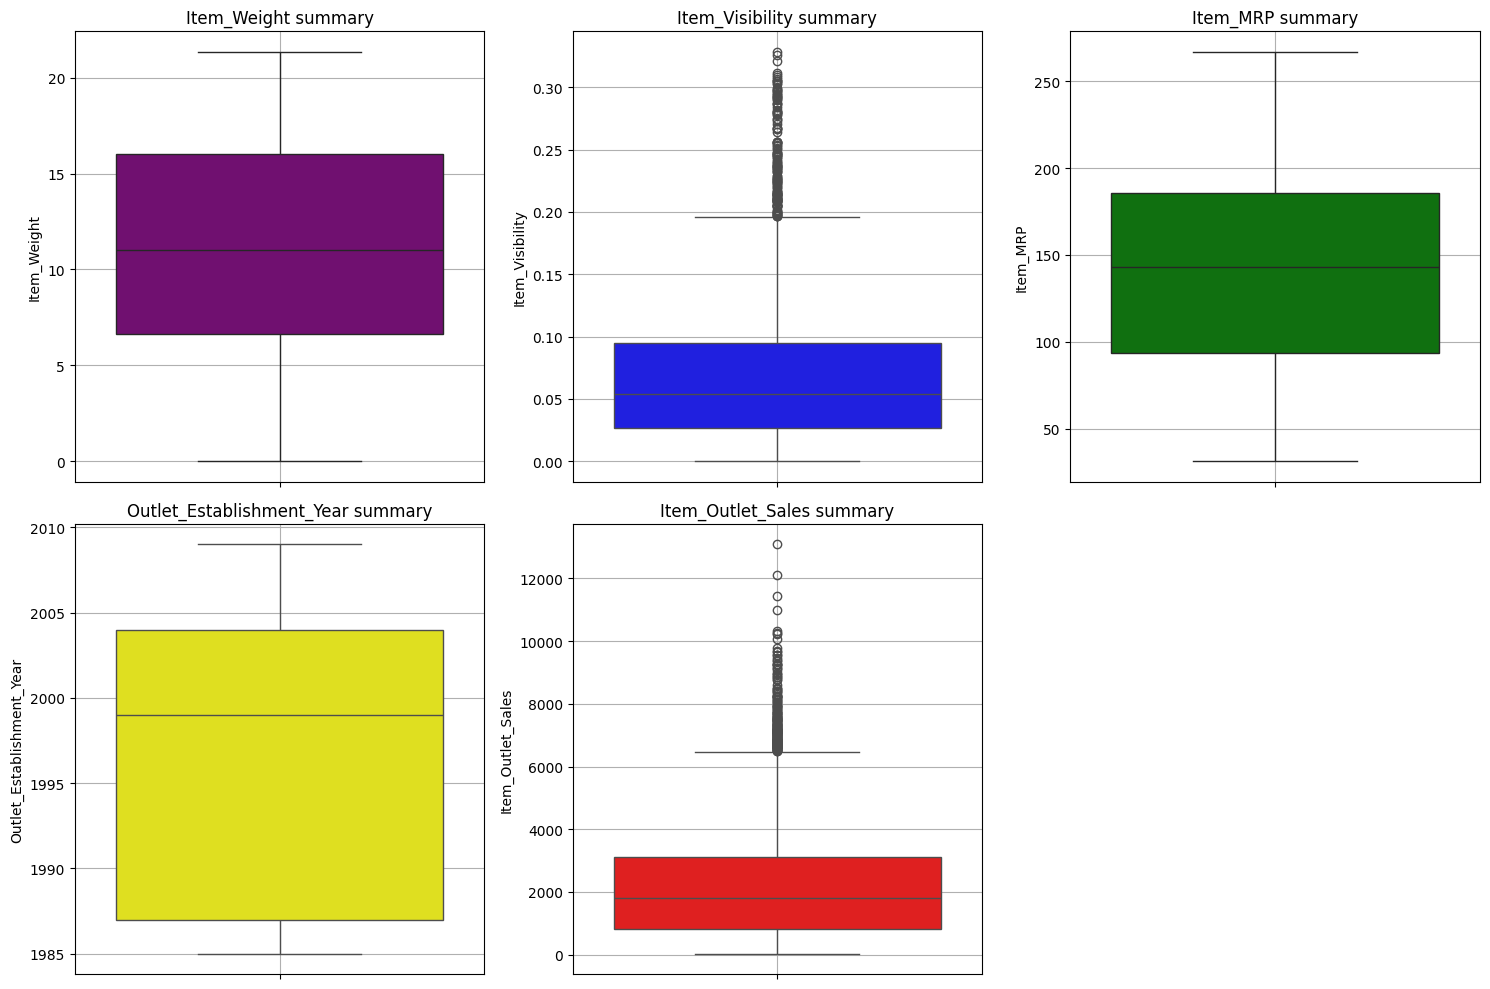

In [25]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));
ax[1][2].axis('off')

for i in range(2):
  for j in range(3):
    index = i*3+j

    if index < len(numerical_cols):
      color = numerical_cols[index][0]
      feature_name = numerical_cols[index][1]

      subplot = sns.boxplot(df[feature_name], ax = ax[i, j], color = color)
      subplot.set_title(f'{feature_name} summary')
      subplot.grid()

fig.tight_layout()
plt.show()

1. We can see **Item_Visiblity** and **Item_Outlet_Sales** columns have outliers
  
  - `visisbility > 0.2` considered outliers
  - `outelet_sales > 6300$` considered outliers
2. We can say that **Item_MRP** can be normal distribution while others are not.

3. Outlet_Establishment_Year is skewed to the left

4. The median(Q2) for each feature:
  - **Item_Weight** approx: 12g

  - **Item_Visibility** approx: 0.06

  - **Item_MRP** approx: 140$

  - **Outlet_Establishment_Year** approx: 1999

  - **Item_Outlet_Sales** approx: 1950$

### **Count plots**

In [26]:
cat_cols = df.select_dtypes('O').drop('Item_Identifier', axis = 1).columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

**Here we dropped Item_Identifier feature from the list**:
- since its only the id of the product.
- there are lot of items in the df so it won't have meaning to plot it.

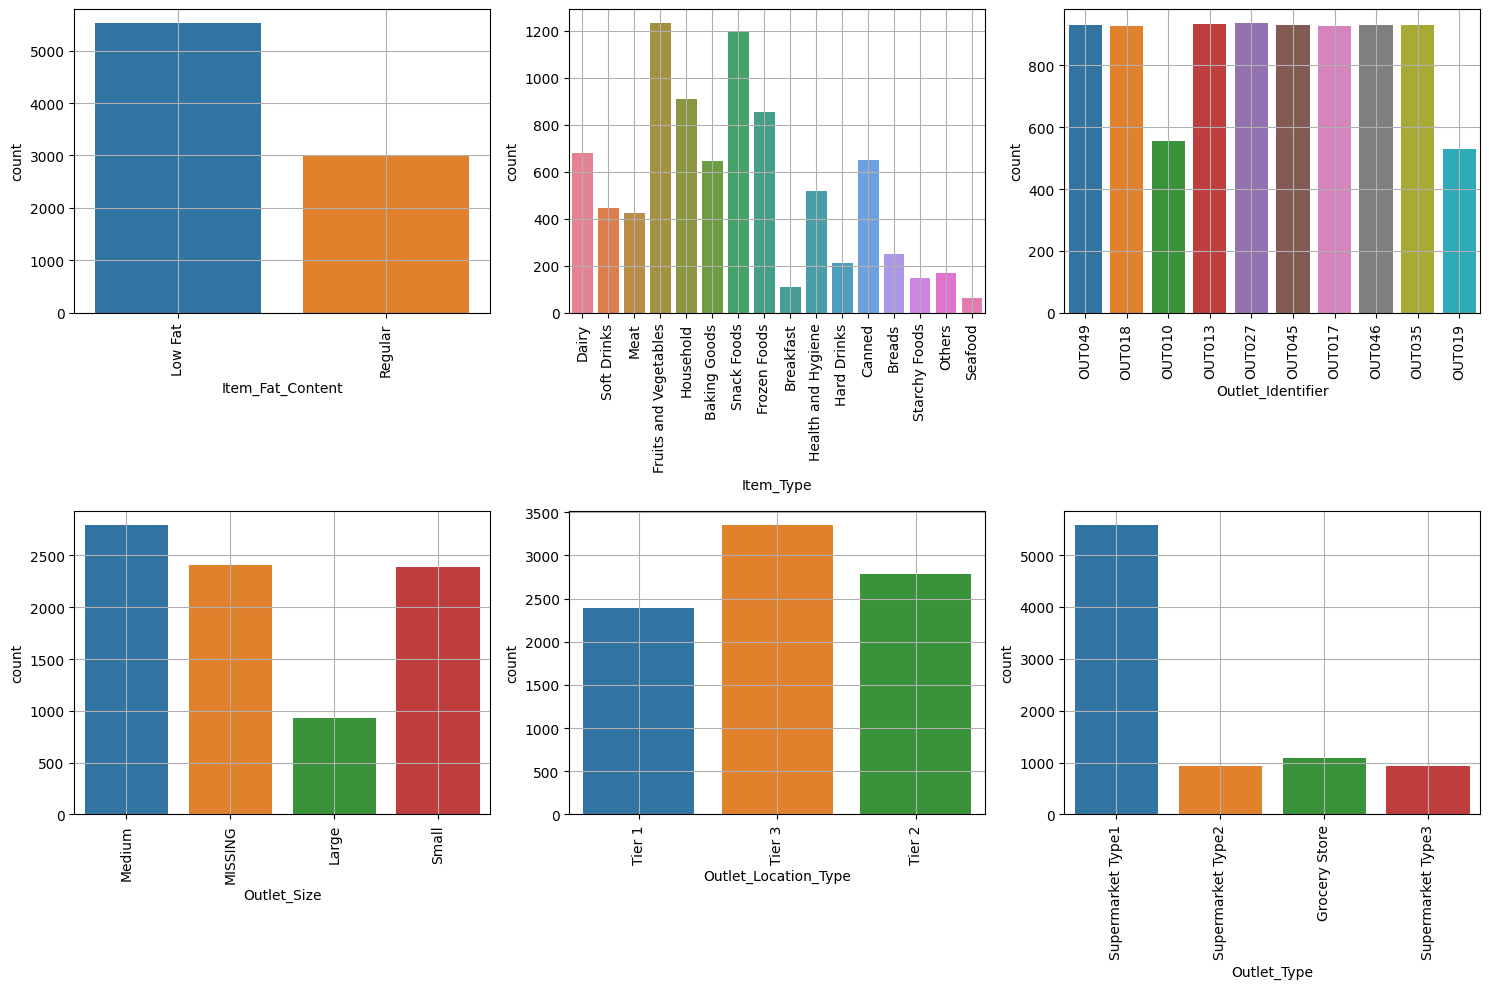

In [27]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10));

for i in range(2):
  for j in range(3):
    index = i*3+j
    if index < len(cat_cols):
      feature_name = cat_cols[index]

      subplot = sns.countplot(
          data = df,
          x = df[feature_name],
          ax = ax[i, j],
          hue = df[feature_name],
      )
      subplot.xaxis.set_tick_params(rotation = 90)
      subplot.grid()

fig.tight_layout()
plt.show()

We can see the frequency of each class in all features:
1. `5500` of items are **Low_Fat** Items, while the rest(3000) are regular fat items.

2. The most occurred items are **Fruits and Vegetables** `1250` times while **Seafood** are the lowest occurred approx `90` times

3. The most occurred outlet in df is OUT027 approx `950` times

4. `2700` of outlets are medium size the most, the least are large outlets `950` outlets.

In [28]:
# def count_plot(feature_name):
#   fig, ax = plt.subplots(figsize = (10, 5))
#   ax.bar(df[feature_name].value_counts().index, df[feature_name].value_counts())
#   ax.set_title(f'{feature_name} distribution')
  # subplot = sns.countplot(data = df, x = df[feature_name])
  # subplot.xaxis.set_tick_params(rotation = 90)
  # subplot.grid()

In [29]:
# context_name = 'notebook'
# cat_cols = list(cat_cols)

# for col in cat_cols:
#   with sns.plotting_context(context_name):
#     count_plot(col)

### **Correlation**

In [30]:
corr = df.corr(numeric_only = True).round(3)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000,-0.078,0.023,0.521,-0.053
Item_Visibility,-0.078,1.000,-0.001,-0.075,-0.129
Item_MRP,0.023,-0.001,1.000,0.005,0.568
Outlet_Establishment_Year,0.521,-0.075,0.005,1.000,-0.049
Item_Outlet_Sales,-0.053,-0.129,0.568,-0.049,1.000


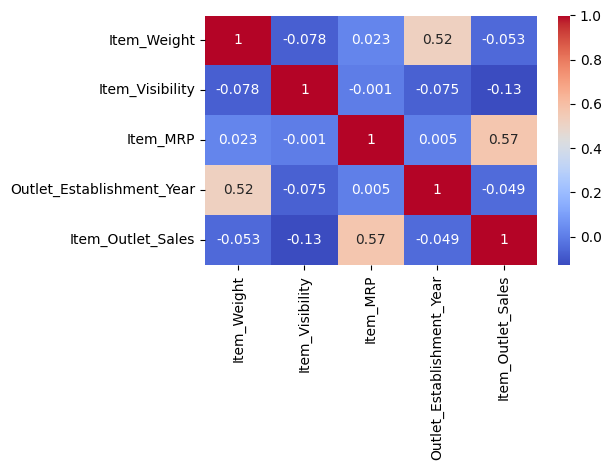

In [73]:
ax = sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'coolwarm',
);

ax.figure.tight_layout()
ax.figure.savefig('heatmap.png', dpi = 300)

**As shown in heatmap we can see:**

1. Item_Weight have moderate **+ve** relation with Outlet_Establishment_Year (0.52)
2. Item_MRP have moderate **+ve** relation with Item_Outlet_Sales (0.57)


### **Item_Weight & Item_fat_content**

We want to explore the weights of items with fat_content

In [74]:
# function to create bar plots with given params
def bar_plot(x, y, hue = None, palette = None, x_size = 10, y_size = 5):
  fig, ax = plt.subplots(figsize = (x_size, y_size))

  ax = sns.barplot(
      data = df,
      x = x,
      y = y,
      hue = hue,
      palette = palette,
  )

  ax.xaxis.set_tick_params(rotation = 90)
  ax.set_title(f'{x} & {y}');
  ax.set_facecolor('#E0E0E0')
  ax.grid(axis = 'y')

  return ax

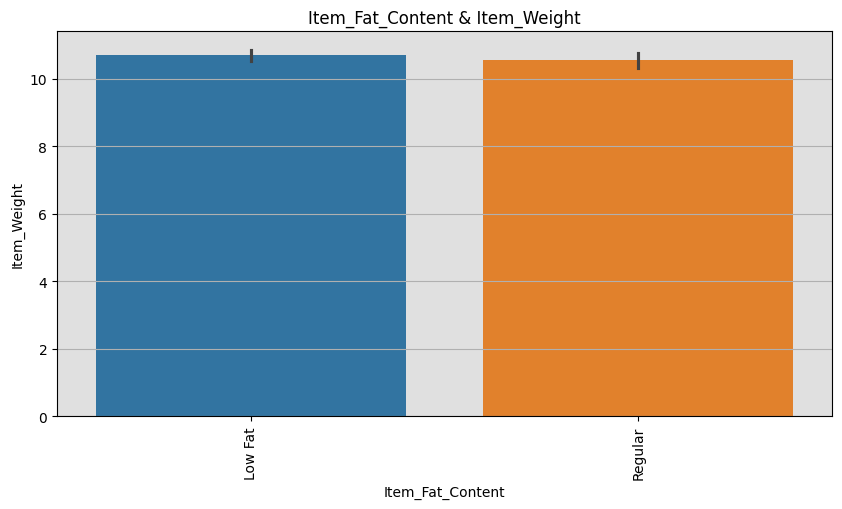

In [76]:
bar_plot(
    x = 'Item_Fat_Content',
    y = 'Item_Weight',
    hue = 'Item_Fat_Content',
);

**Here we can see that the average weight items of `Low_Fat` & `Regular` are close**

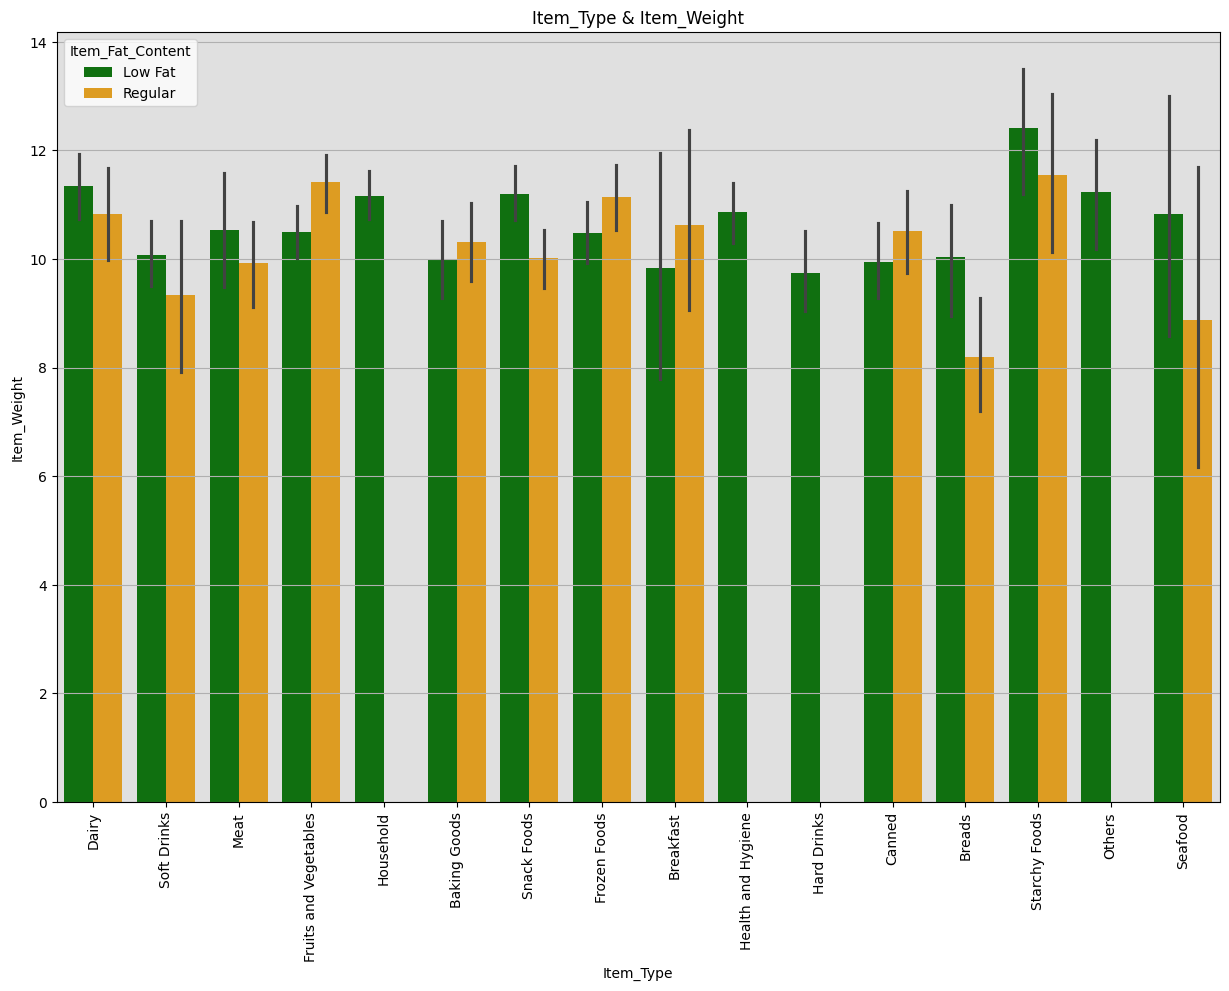

In [77]:
ax = bar_plot(
    x = 'Item_Type',
    y = 'Item_Weight',
    hue = 'Item_Fat_Content',
    palette = {'Regular': '#fca503', 'Low Fat': 'green'},
    x_size = 15,
    y_size = 10,
)

ax.figure.savefig('item_weight_fat_content.png', dpi = 300);

**Here we are seeing the weights based on item types:**
- The average weight of `starchy foods` with **low-fat** content is the highest among other types. Also `starchy foods` with **regular-fat** content is the highest.

- `Household`, `Health and Hygiene`, `Hard Drinks` and `others` are only `low fat` items


### **Item_MRP & Item_Outlet_Sales**

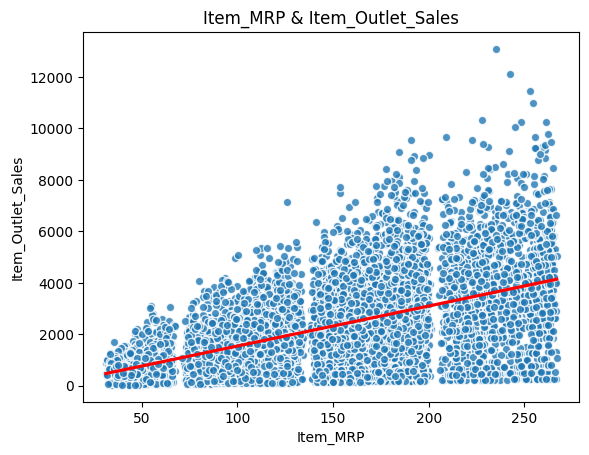

In [78]:
scatter_kws = {'edgecolor': 'white'}
line_kws = {'color': 'red'}

ax = sns.regplot(
    data = df,
    x = 'Item_MRP',
    y = 'Item_Outlet_Sales',
    scatter_kws = scatter_kws,
    line_kws = line_kws,
)

ax.set_title('Item_MRP & Item_Outlet_Sales');
ax.figure.savefig('item_mrp_outlet_sales.png', dpi = 300)

From the plot, we can see that it's divided into 4 different groups, but in general, we can say that whenever the `MRP` increases the `outlet_sales` increases

### **Item_MRP & Item_Visibility**

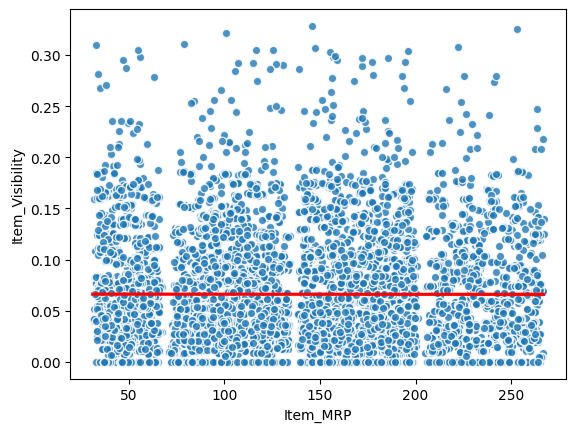

In [69]:
ax = sns.regplot(
    data = df,
    x = 'Item_MRP',
    y = 'Item_Visibility',
    scatter_kws = scatter_kws,
    line_kws = line_kws,
)

**We can see that there is no relation between `Item_MRP` & `Item_Visibility`**

## Feature Inspection